<h1>Data Analysis and Predictions of the Boston House Prices Dataset Análise de Dados e Previsões do Dataset Boston House Prices 

## O objetivo deste projeto é aprender em como analisar dados e efetuar regressões lineares múltiplas.

<h3>Importando bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Carregando dataset
df = pd.read_csv('boston.csv')

# Dicionário de Dados

# Variáveis independentes:
# 1) CRIM: taxa de crime por cidade per capita
# 2) ZN: proporção de terrenos residenciais zoneados para lots acima de 2322 metros quadrados
# 3) INDUS: proporção de negócios não varejistas em acres por cidade
# 4) CHAS: Variável dummy do Rio Charles (1 se o trato limita o rio; 0 se não)
# 5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M] concentração de óxido nítrico(partes por 10 milhões) [partes/10M]
# 6) RM: Média de quartos por residência
# 7) AGE: proporção de residências ocupadas por seus donos construídas anteriormente a 1940
# 8) DIS: distâncias ponderadas para cinco centros de emprego de Boston
# 9) RAD: índice de acessibilitade para rodovias radiais
# 10) TAX: impostos para o valor total da propriedade por $10.000 [$/10k]
# 11) PTRATIO: relação de estudantes-professores por cidade
# 12) B: resultado da equação B=1000(Bk - 0.63)^2 onde Bk é a proporção de negros por cidade
# 13) LSTAT: % status mais baixo da população
# 
# Variável dependente:
#   1) MEDV: Valor mediano de residências ocupadas por seus proprietários em $1000's [k$]

## Visão geral

In [116]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


This dataframe seems composed only of numerical data.

### Checagem dos tipos de colunas

In [117]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

Nada aparenta estar fora de ordem.

### Busca por valores faltantes

In [118]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Nenhum valor faltante fora encontrado, seguimos para as duplicatas.

### Busca por duplicatas

In [119]:
df.duplicated().value_counts()

False    506
dtype: int64

Nenhuma duplicata encontrada.

In [120]:
#estatísticas das variáveis númericas
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Correlações

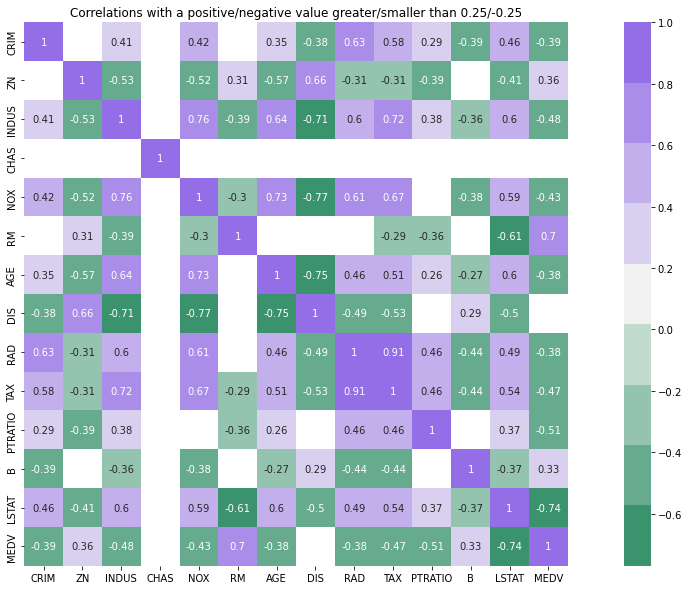

In [121]:
#Criando Matrix de correlação
corr = df.corr()
mask_corr = corr[(corr >= 0.25) | (corr <= -0.25)]

plt.figure(figsize=(20, 10))
plt.title('Mostrando apenas correlações com valores posivitos/negativos maiores/menores que  0.25/-0.25')

ax = sns.heatmap(mask_corr, cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9), square = True, annot = True)

In [122]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Enquanto isso, RAD e TAX tem uma alta correlação (0,91) que pode indicar que <b> um influencia o outro </b> e que pode afetar o modelo preditivo nos passos seguintes. É observado em CHAS que ele tem uma correlação quase neutra com o resto das outras características sendo sua máxima 0.18 e sua mínima -0.12. DIS tem três instâncias de correlações significantes com INDUS(-0,71), AGE(-0,75) e NOX(-0,77) que são preocupantes. Dada a análise de correlações, CHAS, TAX, e DIS, serão removidos.

### Padronização de Dados

In [3]:
from sklearn.preprocessing import StandardScaler
cols = df.drop(['CHAS', 'DIS', 'TAX'], axis = 1)
cols = cols.columns

scaler = StandardScaler()
scaler.fit(df.drop(['CHAS', 'DIS', 'TAX'], axis = 1))

transform = scaler.transform(df.drop(['CHAS', 'DIS', 'TAX'], axis = 1))

scaled_df = pd.DataFrame(transform, columns = cols)
scaled_df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.144217,0.413672,-0.120013,-0.982843,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,-0.867883,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,-0.867883,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,-0.752922,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.835284,1.228577,-0.511180,-0.752922,0.113032,0.441052,-1.026501,1.487503


### Checando a distorção dos dados

Esta seção de transformação de distorção é <b>apenas demonstrativa</b>, ela não será utilizada para o tratamento dos dados, pois durante os testes fora constatado que se efetuada a remoção da distorção os resultados eram muito inferiores se comparados aos não tratados para distorção.

<AxesSubplot:>

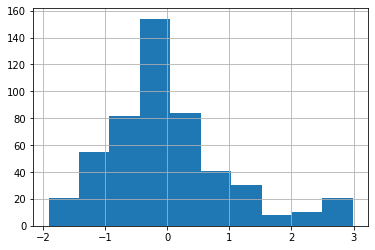

In [124]:
scaled_df['MEDV'].hist()

A distribuição de MEDV é um pouco distorcida para a esquerda

### Checando a distorção em números

In [125]:
scaled_df.skew(axis = 0)

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
NOX        0.729308
RM         0.403612
AGE       -0.598963
RAD        1.004815
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64

A variável dependente (MEDV) está altamente distorcida (+1 ou -1 é considerado como distorção alta) e a maioria das variáveis estão de moderada a altamente distorcidas.

### Gráficos representando a distorção e as tratando com Power Transformer e Quantile Transformer

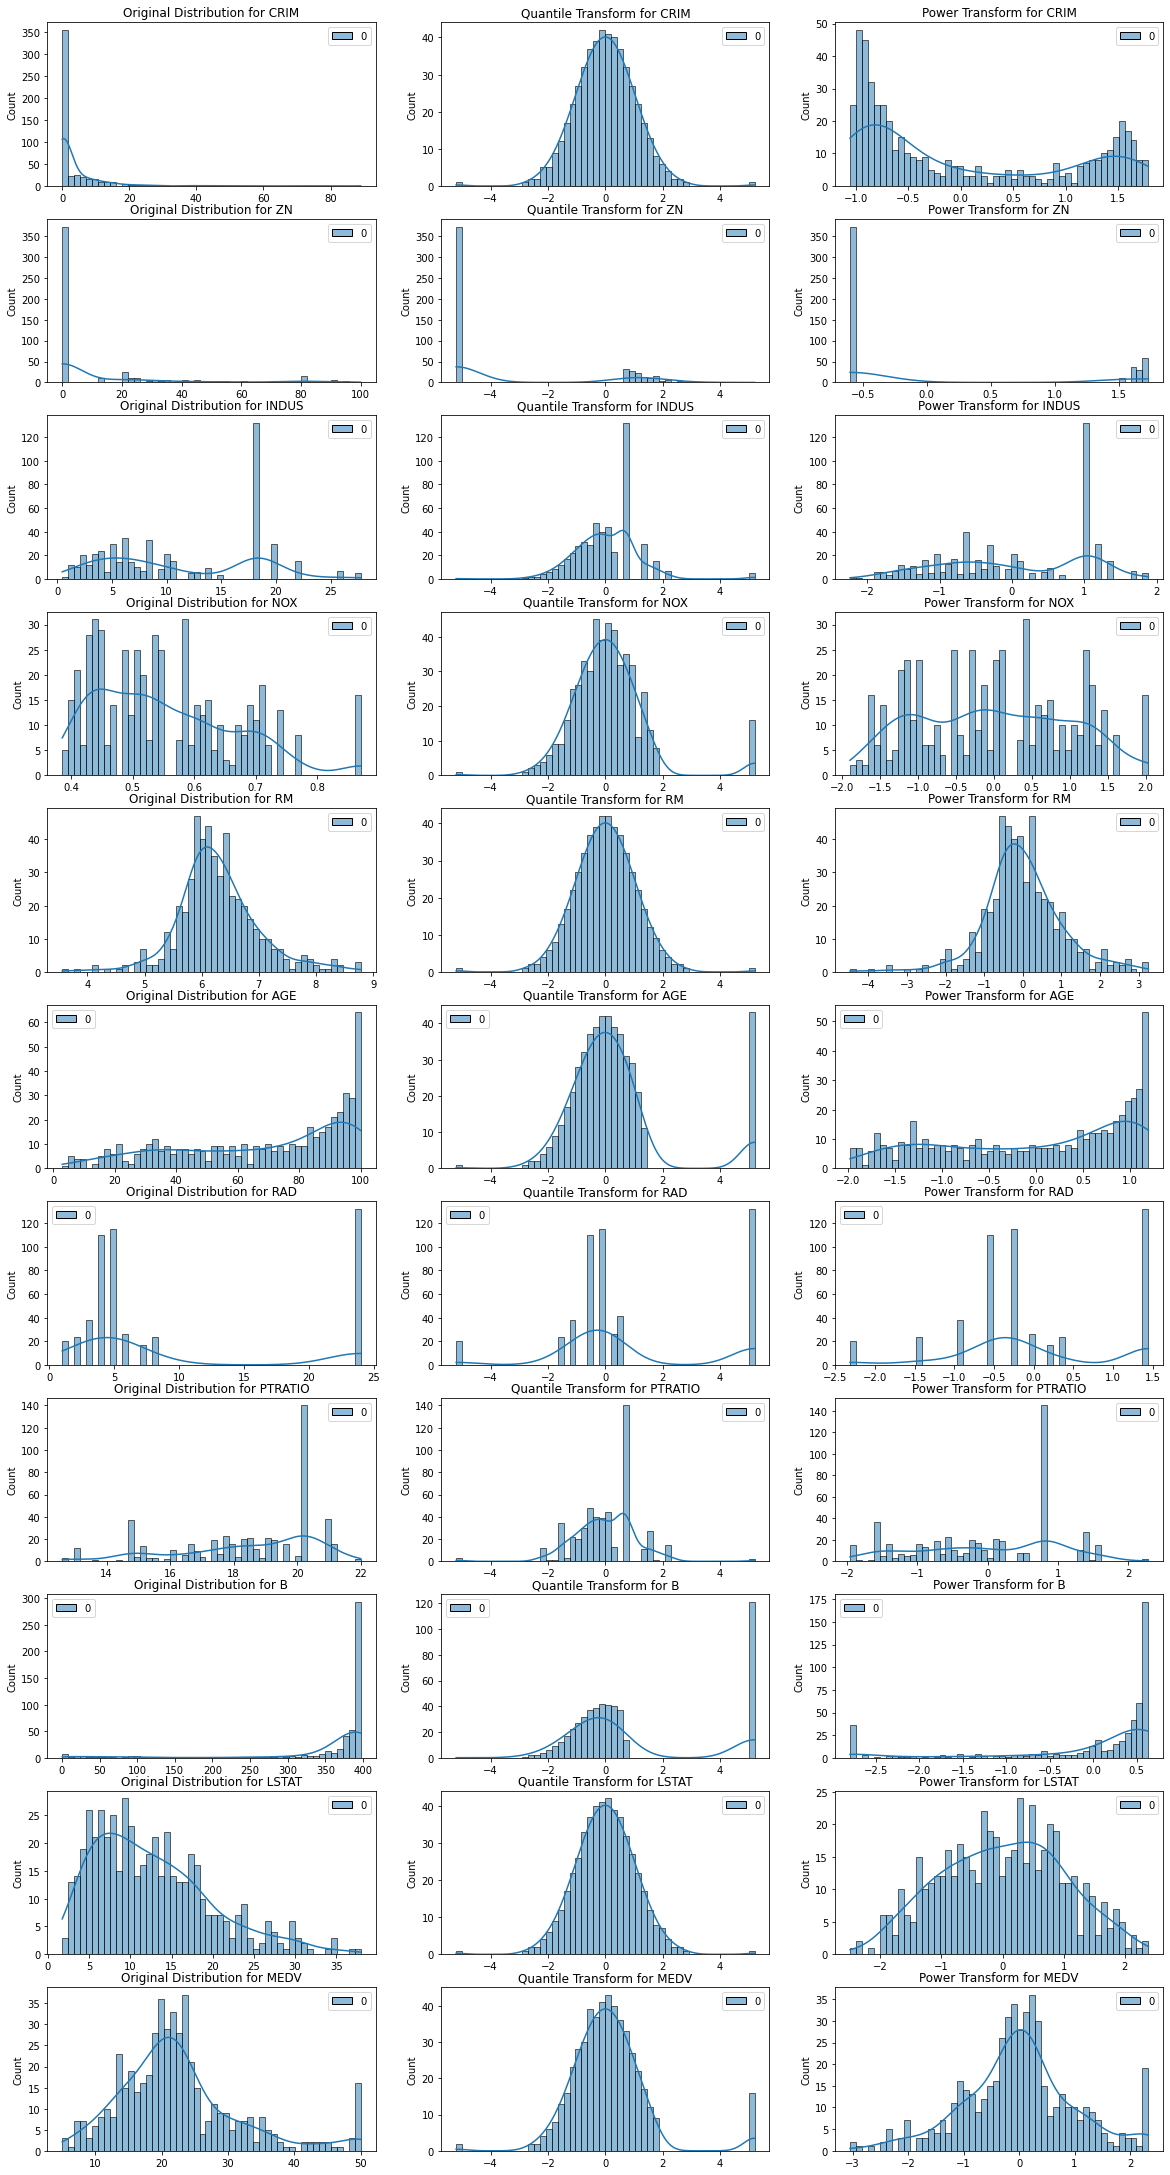

In [126]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

cols1 = scaled_df.columns
def test_transformers(columns):
    pt = PowerTransformer()
    qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
    fig = plt.figure(figsize=(20,50))
    j = 1
    for i in columns:
        array = np.array(df[i]).reshape(-1, 1)
        y = pt.fit_transform(array)
        x = qt.fit_transform(array)
        
        plt.subplot(14,3,j)
        sns.histplot(array, bins = 50, kde = True)
        plt.title(f"Original Distribution for {i}")
        
        plt.subplot(14,3,j+1)
        sns.histplot(x, bins = 50, kde = True)
        plt.title(f"Quantile Transform for {i}")
        
        plt.subplot(14,3,j+2)
        sns.histplot(y, bins = 50, kde = True)
        plt.title(f"Power Transform for {i}")
        j += 3
test_transformers(cols1)

Nos gráficos acima é possível identificar que o Quantile Transformer é a melhor escolha para estes dados.

### Transformando dados utilizando Quantile Transformer

In [127]:
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
qtrans = qt.fit_transform(scaled_df)

In [128]:
qtrans = pd.DataFrame(qtrans)

In [129]:
cols = scaled_df.columns
qtrans.set_axis(cols, axis = 1, inplace = True)

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>]],
      dtype=object)

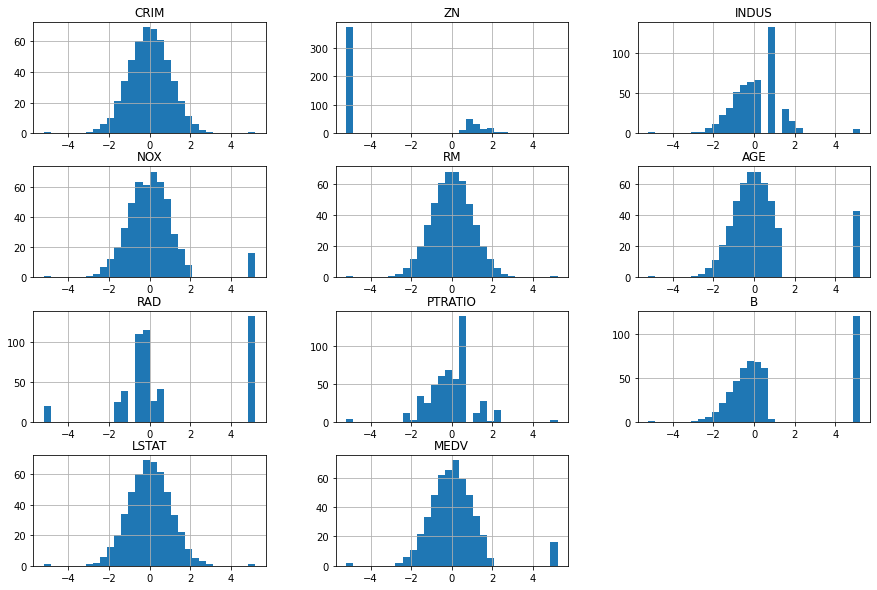

In [130]:
qtrans.hist(bins=30, figsize=(15, 10))

### Criando amostras para teste

In [4]:
data = scaled_df.values
X, y = data[:, :-1], data[:, -1]

In [5]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


print("number of test samples :", X_test.shape[0])
print("number of training samples:", X_train.shape[0])

number of test samples : 167
number of training samples: 339


### Busca e Remoção de Outliers

Para estes dados a remoção dos outliers quebrou a maioria dos modelos preditivos e por isso <b> não estarei os utilizando neste projeto. </b> A seção é apenas demonstrativa com exemplos do que pode ser feito para remover outliers.

In [39]:
#Isolation Forest

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error

# identificando os outliers no dataset de treino
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)

# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

# sumarizando o formato do dataset atualizado
print(X_train.shape, y_train.shape)

# ajustando o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# avaliando o modelo
yhat = model.predict(X_test)

# avaliando as previsões
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(267, 10) (267,)
MAE: 0.380


In [38]:
#Minimum Covariance Determinant

from sklearn.linear_model import LinearRegression
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import mean_absolute_error

# identificando os outliers no dataset de treino
ee = EllipticEnvelope(contamination=0.01)
yhat = ee.fit_predict(X_train)

# selecionando todas as linhas que não são outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

# sumarizando o formato do dataset atualizado
print(X_train.shape, y_train.shape)

# ajustando o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# avaliando o modelo
yhat = model.predict(X_test)

# avaliando as previsões
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(297, 10) (297,)
MAE: 0.390


In [36]:
#Local Outlier Factor

from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# identificando os outliers no dataset de treino
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

# selecionando todas as linhas que não são outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

# sumarizando o formato do dataset atualizado
print(X_train.shape, y_train.shape)

# ajustando o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# avaliando o modelo
yhat = model.predict(X_test)

# avaliando as previsões
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' %mae)

(317, 10) (317,)
MAE: 0.387


In [37]:
#One-Class SVM
from sklearn.linear_model import LinearRegression
from sklearn.svm import OneClassSVM
from sklearn.metrics import mean_absolute_error

# identificando os outliers no dataset de treino
ee = OneClassSVM(nu=0.01)
yhat = ee.fit_predict(X_train)

# selecionando todas as linhas que não são outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

# sumarizando o formato do dataset atualizado
print(X_train.shape, y_train.shape)

# ajustando o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# avaliando o modelo
yhat = model.predict(X_test)

# avaliando as previsões
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' %mae)

(300, 10) (300,)
MAE: 0.390


### Criando e Testando Modelos

In [31]:
def model_evaluate(model, X_test, X_train, y_train, y_test):
    from sklearn import metrics
    
    y_pred = model.predict(X_test)
    
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = metrics.mean_squared_error(y_test, y_pred, squared = False)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2 Score': r2}

In [71]:
#Regressão Linear

#Criando o Modelo Linear
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [72]:
#Resultados da Regressão Linear
lr_eval = model_evaluate(lr, X_test, X_train, y_train, y_test)

print('MSE:', lr_eval['MSE'])
print('RMSE:', lr_eval['RMSE'])
print('MAE:', lr_eval['MAE'])
print('R2 Score:', lr_eval['R2 Score'])

MSE: 0.28958500737707943
RMSE: 0.5381310317915883
MAE: 0.4046962315530139
R2 Score: 0.7223763718833878


In [73]:
#Modelo de Regressão Linear - OLS
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

lr = LinearRegression()

X_constant = sm.add_constant(X_train)

lr = sm.OLS(y_train,X_constant).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     69.83
Date:                Fri, 08 Jul 2022   Prob (F-statistic):           3.93e-75
Time:                        18:45:23   Log-Likelihood:                -283.66
No. Observations:                 339   AIC:                             589.3
Df Residuals:                     328   BIC:                             631.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0091      0.031      0.292      0.770      -0.052       0.070
x1            -0.0655      0.043     -1.534      0.126      -0.149       0.019
x2             0.0036      0.044      0.082      0.934      -0.082       0.089
x3             0.0622      0.054      1.163      0.246      -0.043       0.167
x4            -0.1751      0.061     -2.892      0.004      -0.294      -0.056
x5             0.2966      0.046      6.410      0.000       0.206       0.388
x6             0.0993      0.052      1.901      0.058      -0.003       0.202
x7             0.1442      0.053      2.736      0.007       0.041       0.248
x8            -0.2753      0.043     -6.474      0.000      -0.359      -0.192
x9             0.0847      0.036      2.353      0.019       0.014       0.156
x10           -0.4288      0.053     -8.066      0.000      -0.533      -0.324
==============================================================================
Omnibus:                      153.134   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              779.180
Skew:                           1.871   Prob(JB):                    6.36e-170
Kurtosis:                       9.415   Cond. No.                         5.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
#Regressão de Ridge

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

steps = [
        ('poly', PolynomialFeatures(degree=2)),
        ('model', Ridge(alpha=0.1, fit_intercept=True))
    ]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()), ('model', Ridge(alpha=0.1))])

In [75]:
#Resultados da Regressão de Ridge
ridge_eval = model_evaluate(ridge_pipe, X_test, X_train, y_train, y_test)

print('MSE:', ridge_eval['MSE'])
print('RMSE:', ridge_eval['RMSE'])
print('MAE:', ridge_eval['MAE'])
print('R2 Score:', ridge_eval['R2 Score'])

MSE: 0.2913624081000111
RMSE: 0.5397799626699856
MAE: 0.34956168004767046
R2 Score: 0.720672387130217


In [76]:
#Regressão de Lasso

from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

steps = [
        ('poly', PolynomialFeatures(degree=3)),
        ('model', Lasso(alpha=0.02, fit_intercept=False, max_iter=5000))
    ]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('model',
                 Lasso(alpha=0.02, fit_intercept=False, max_iter=5000))])

In [77]:
#Resultados da Regressão de Lasso
lasso_eval = model_evaluate(lasso_pipe, X_test, X_train, y_train, y_test)

print('MSE:', lasso_eval['MSE'])
print('RMSE:', lasso_eval['RMSE'])
print('MAE:', lasso_eval['MAE'])
print('R2 Score:', lasso_eval['R2 Score'])

MSE: 0.15915168550213923
RMSE: 0.3989381975972459
MAE: 0.280034235079966
R2 Score: 0.8474221136301994


In [78]:
#Regressão da Árvore de Decisão

from sklearn.tree import DecisionTreeRegressor 

dtr = DecisionTreeRegressor(random_state = 1)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [79]:
#Resultados da Árvore de Decisão
dtr_eval = model_evaluate(dtr, X_test, X_train, y_train, y_test)

print('MSE:', dtr_eval['MSE'])
print('RMSE:', dtr_eval['RMSE'])
print('MAE:', dtr_eval['MAE'])
print('R2 Score:', dtr_eval['R2 Score'])

MSE: 0.31239675272392137
RMSE: 0.5589246395748906
MAE: 0.3798884170395283
R2 Score: 0.7005068712340812


In [80]:
#Modelo de Floresta Aleatória
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=2, random_state=0)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [81]:
#Resultados da Floresta Aleatória
rfr_eval = model_evaluate(rfr, X_test, X_train, y_train, y_test)

print('MSE:', rfr_eval['MSE'])
print('RMSE:', rfr_eval['RMSE'])
print('MAE:', rfr_eval['MAE'])
print('R2 Score:', rfr_eval['R2 Score'])

MSE: 0.24608019838803666
RMSE: 0.49606471189557183
MAE: 0.3645419966544986
R2 Score: 0.7640842041411922


In [13]:
#Regressão da Máquina de Vetores de Suporte
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [83]:
#Resultados da Máquina de Vetores de Suporte
svr_eval = model_evaluate(svr, X_test, X_train, y_train, y_test)

print('MSE:', svr_eval['MSE'])
print('RMSE:', svr_eval['RMSE'])
print('MAE:', svr_eval['MAE'])
print('R2 Score:', svr_eval['R2 Score'])

MSE: 0.14417273756024526
RMSE: 0.37970085272520165
MAE: 0.26255203355357154
R2 Score: 0.8617823524791102


### Comparação Gráfica dos Modelos

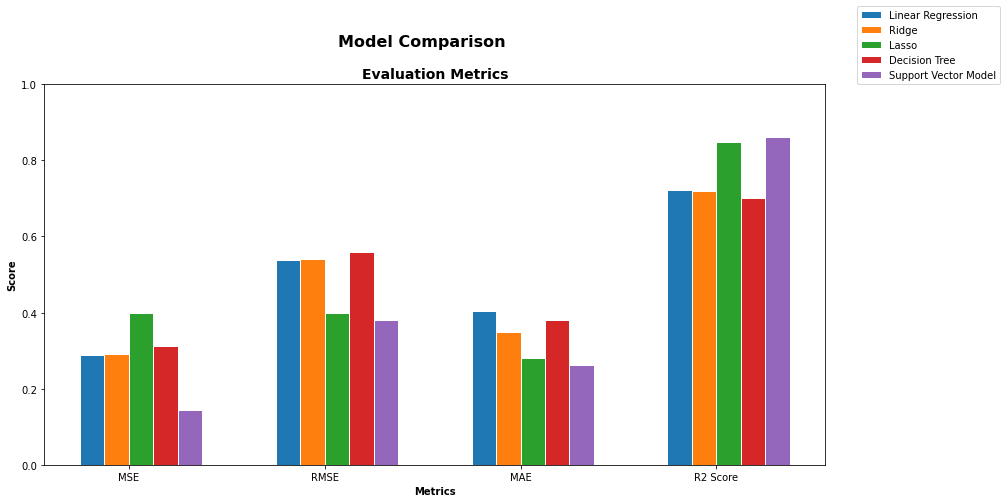

In [85]:
# Configurando as figuras
fig = plt.figure()
ax = fig.add_subplot(111)
fig.suptitle('Comparação de Modelos', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# Primeiro gráfico
# configurando o tamanho das barras
barraLargura = 0.125

lr_score = [lr_aval['MSE'], lr_aval['RMSE'], lr_aval['MAE'], lr_aval['R2 Score']]
ridge_score = [ridge_aval['MSE'], ridge_eval['RMSE'], ridge_aval['MAE'], ridge_aval['R2 Score']]
lasso_score = [lasso_aval['RMSE'], lasso_eval['RMSE'], lasso_eval['MAE'], lasso_aval['R2 Score']]
dtr_score = [dtr_aval['MSE'], dtr_aval['RMSE'], dtr_aval['MAE'], dtr_aval['R2 Score']]
svr_score = [svr_aval['MSE'], svr_aval['RMSE'], svr_aval['MAE'], svr_aval['R2 Score']]
rfr_score = [rfr_aval['RMSE'], rfr_aval['RMSE'], rfr_aval['MAE'], rfr_aval['R2 Score']]

# Inserindo a posição da barra no eixo X
r1 = np.arange(len(lr_score))
r2 = [x + barraLargura for x in r1]
r3 = [x + barraLargura for x in r2]
r4 = [x + barraLargura for x in r3]
r5 = [x + barraLargura for x in r4]
r6 = [x + barraLargura for x in r5]


# Criando os gráficos
ax.bar(r1, lr_score, width=barraLargura, edgecolor='white', label='Regressão Linear')
ax.bar(r2, ridge_score, width=barraLargura, edgecolor='white', label='Ridge')
ax.bar(r3, lasso_score, width=barraLargura, edgecolor='white', label='Lasso')
ax.bar(r4, dtr_score, width=barraLargura, edgecolor='white', label='Árvore de Decisão')
ax.bar(r5, svr_score, width=barraLargura, edgecolor='white', label='Máquina de Vetores de Suporte')
ax.bar(r6, rfr_score, width=barraLargura, edgecolor='white', label='Floresta Aleatória')

# Configurando os eixos X e Y

labels = ['MSE', 'RMSE', 'MAE', 'R2 Score']
ax.set_xlabel('Métricas', fontweight='bold')

ax.set_xticks([r + (barWidth * 1.5) for r in range(len(lr_score))], )
ax.set_xticklabels(labels)

ax.set_ylabel('Score', fontweight='bold')
ax.set_ylim(0, 1)

# Criando legenda e título
ax.set_title('Métricas de Avaliação', fontsize=14, fontweight='bold')
ax.legend()
ax.legend(loc=(1.04,1))

plt.show()

Dos modelos testados, a Máquina de Vetores de Suporte (SVM), performou melhor do que os outros modelos com 0,86 de R2 e MAE de 0,26.